# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
pip install yellowbrick

In [ ]:
#Type your code here

# Import library dasar
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [ ]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [ ]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0            1.0   
1         68.0             Doctor                141.0            1.0   
2         19.0            Student                 56.0            1.0   
3         26.0            Student                 25.0            1.0   
4          NaN            Student                198.0            1.0   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35  
2         1122.35     2024-11-04 08:07:04  
3         8569.06     2024-11-04 08:09:06  
4         7429.40     2024-11-04 08:06:39

In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2511.000000  2519.000000          2511.000000    2516.000000   
mean          297.656468    44.678444           119.422939       1.121622   
std           292.230367    17.837359            70.078513       0.594469   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.310000    27.000000            63.000000       1.000000   
50%           211.360000    45.000000           112.000000       1.000000   
75%           413.105000    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2510.000000  
mean      5113.438124  
std       3897.975861  
min        101.250000  
25%       1504.727500  
50%       4734.110000  
75%       7672.687500  
max      14977.990000

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

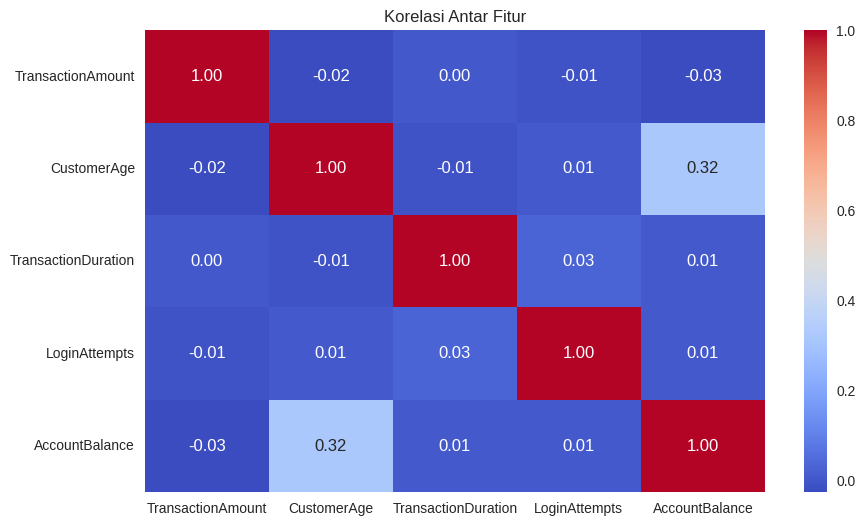

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()

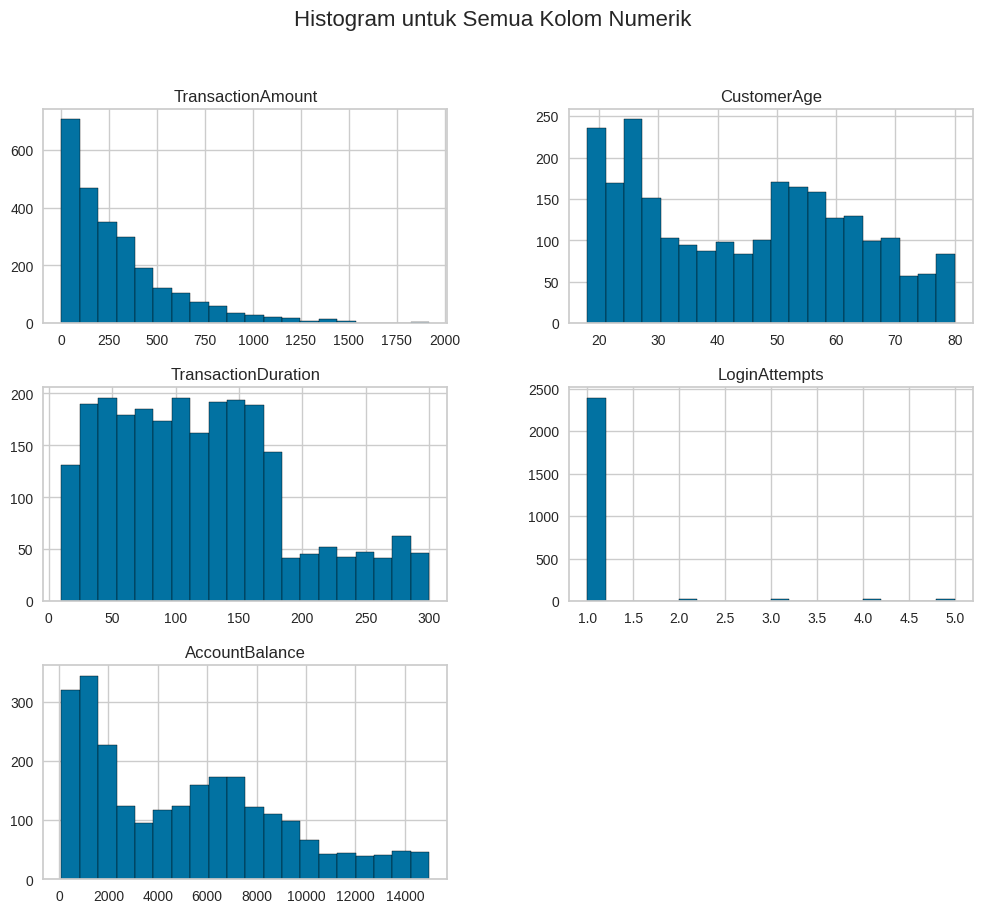

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle("Histogram untuk Semua Kolom Numerik", fontsize=16)
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

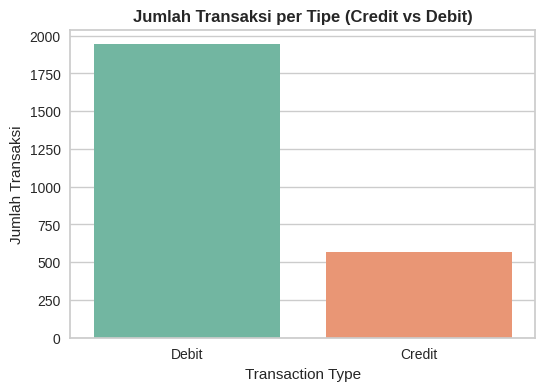

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="TransactionType", hue="TransactionType", palette="Set2", legend=False)
plt.title("Jumlah Transaksi per Tipe (Credit vs Debit)", fontsize=12, fontweight="bold")
plt.xlabel("Transaction Type")
plt.ylabel("Jumlah Transaksi")
plt.show()


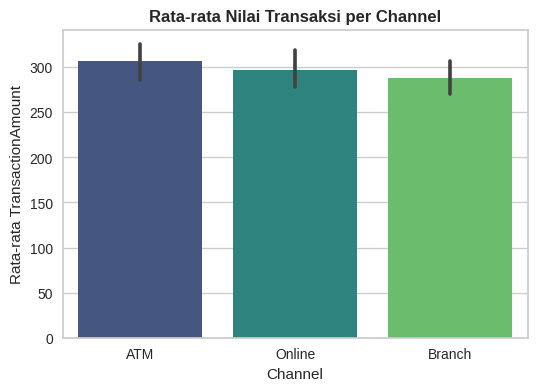

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=df,
    x="Channel",
    y="TransactionAmount",
    hue="Channel",
    palette="viridis",
    estimator=np.mean,
    legend=False
)
plt.title("Rata-rata Nilai Transaksi per Channel", fontsize=12, fontweight="bold")
plt.ylabel("Rata-rata TransactionAmount")
plt.show()

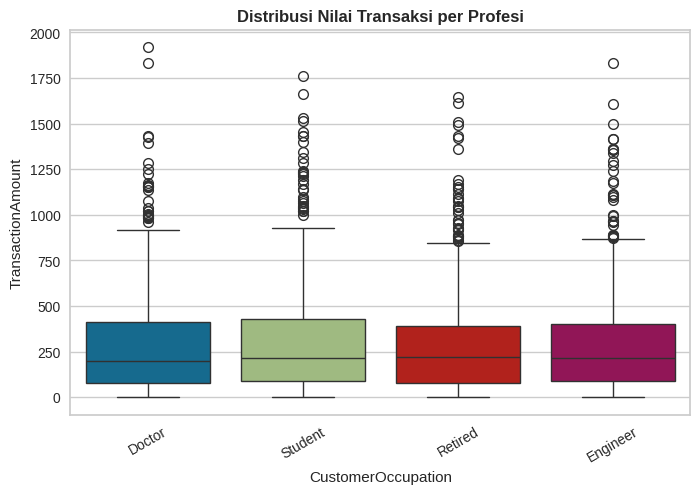

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x="CustomerOccupation",
    y="TransactionAmount",
    hue="CustomerOccupation",
    legend=False
)
plt.title("Distribusi Nilai Transaksi per Profesi", fontsize=12, fontweight="bold")
plt.xticks(rotation=30)
plt.show()


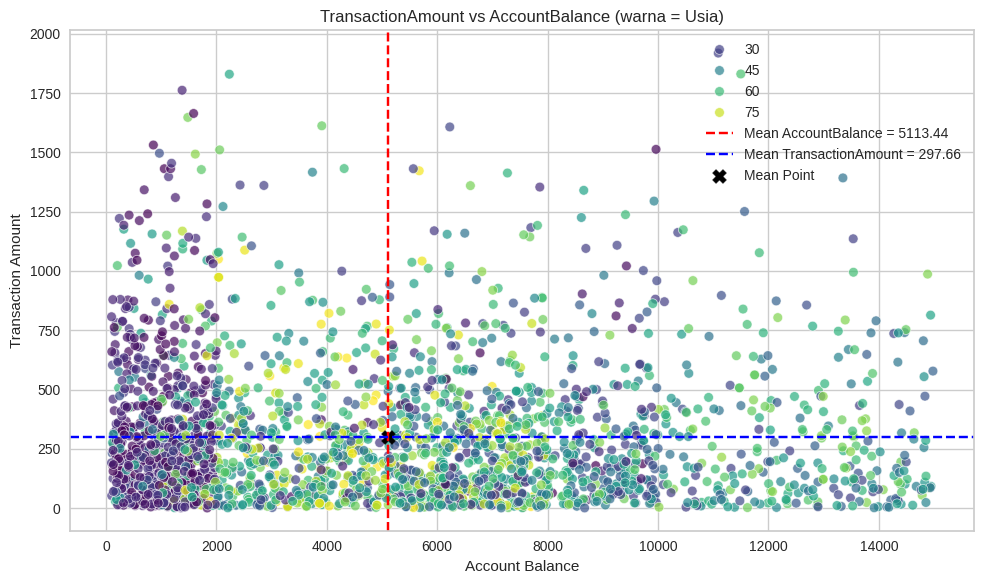

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="AccountBalance",
    y="TransactionAmount",
    hue="CustomerAge",
    palette="viridis",
    alpha=0.7
)

# Rata-rata
mean_x = df["AccountBalance"].mean()
mean_y = df["TransactionAmount"].mean()

# Garis rata-rata
plt.axvline(mean_x, color="red", linestyle="--", label=f"Mean AccountBalance = {mean_x:.2f}")
plt.axhline(mean_y, color="blue", linestyle="--", label=f"Mean TransactionAmount = {mean_y:.2f}")

# Titik rata-rata gabungan
plt.scatter(mean_x, mean_y, color="black", s=100, marker="X", label="Mean Point")

plt.title("TransactionAmount vs AccountBalance (warna = Usia)")
plt.xlabel("Account Balance")
plt.ylabel("Transaction Amount")
plt.legend()
plt.tight_layout()
plt.show()

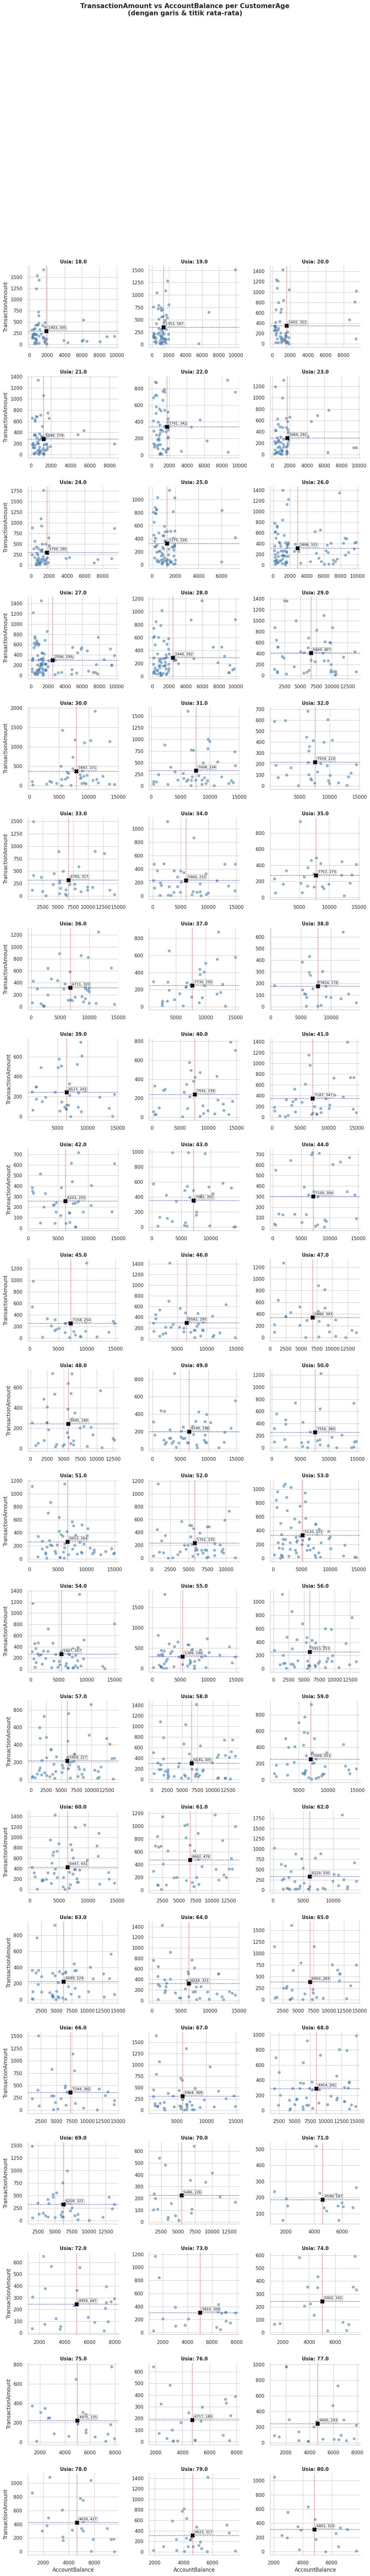

In [ ]:
# Style
sns.set_theme(style="whitegrid")

# FacetGrid per usia
g = sns.FacetGrid(
    df, col="CustomerAge", col_wrap=3, height=4,
    sharex=False, sharey=False, despine=True
)

# Scatterplot
g.map_dataframe(
    sns.scatterplot,
    x="AccountBalance", y="TransactionAmount",
    alpha=0.6, color="steelblue", edgecolor=None
)

# Garis & titik rata-rata per usia
for ax, (age, subdf) in zip(g.axes.flatten(), df.groupby("CustomerAge")):
    mean_x = subdf["AccountBalance"].mean()
    mean_y = subdf["TransactionAmount"].mean()

    # garis rata-rata
    ax.axvline(mean_x, color="red", linestyle="--", lw=1, alpha=0.7)
    ax.axhline(mean_y, color="blue", linestyle="--", lw=1, alpha=0.7)

    # titik rata-rata
    ax.scatter(mean_x, mean_y, color="black", s=90, marker="X", zorder=5)

    # anotasi dengan offset agar tidak menimpa titik
    transform = offset_copy(ax.transData, fig=g.fig, x=5, y=5, units='points')
    ax.text(
        mean_x, mean_y, f"{mean_x:.0f}, {mean_y:.0f}",
        fontsize=8, color="black", transform=transform,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.7)
    )

    # judul subplot
    ax.set_title(f"Usia: {age}", fontsize=11, fontweight="bold")

# Tambah jarak antar subplot
plt.subplots_adjust(top=0.88, hspace=0.35)

# Judul utama
g.fig.suptitle(
    "TransactionAmount vs AccountBalance per CustomerAge\n(dengan garis & titik rata-rata)",
    fontsize=15, fontweight="bold"
)

plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()

df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.


# Pilih hanya fitur numerik yang relevan untuk scaling
numeric_cols = [
    "TransactionAmount",
    "CustomerAge",
    "TransactionDuration",
    "LoginAttempts",
    "AccountBalance"
]

# Buat scaler
scaler = StandardScaler()

# Fit transform hanya ke kolom numerik yang dipilih
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Tampilkan hasil scaling
df_scaled.head()

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -0.970546  2023-04-11 16:29:14   
1      TX000002   AC00455           0.268963  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586526  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387294  2023-05-05 16:32:11   
4      TX000005   AC00411          -0.972736  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862             Doctor            -0.548393      -0.204629   
1     1.307715             Doctor             0.307960      -0.204629   
2    -1.439874            Student            -0.905207      -0.204629   
3    -1.047361            Student            -1.347656      -0.204629   
4          NaN            Student             1.121495      -0.204629   

   AccountBalance PreviousTransactionDate  
0       -0.000315     2024-11-04 08:08:08  
1        2.218381     2024-11-04 08:09:35  
2       -1.024091     2024-11-04 08:07:04  
3        0.886694     2024-11-04 08:09:06  
4        0.594263     2024-11-04 08:06:39

In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

# Identifikasi kolom yang mengandung 'id' atau 'ip'
id_cols = [c for c in df.columns if 'id' in c.lower() or 'ip' in c.lower()]

# Buat salinan df tanpa kolom id dan IP
df_dropped = df_scaled.drop(columns=id_cols, errors='ignore')

# Tampilkan hasil
df_dropped.head()

TransactionAmount      TransactionDate TransactionType   Location Channel  \
0          -0.970546  2023-04-11 16:29:14           Debit  San Diego     ATM   
1           0.268963  2023-06-27 16:44:19           Debit    Houston     ATM   
2          -0.586526  2023-07-10 18:16:08           Debit       Mesa  Online   
3          -0.387294  2023-05-05 16:32:11           Debit    Raleigh  Online   
4          -0.972736  2023-10-16 17:51:24          Credit    Atlanta  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862             Doctor            -0.548393      -0.204629   
1     1.307715             Doctor             0.307960      -0.204629   
2    -1.439874            Student            -0.905207      -0.204629   
3    -1.047361            Student            -1.347656      -0.204629   
4          NaN            Student             1.121495      -0.204629   

   AccountBalance PreviousTransactionDate  
0       -0.000315     2024-11-04 08:08:08  
1        2.218381     2024-11-04 08:09:35  
2       -1.024091     2024-11-04 08:07:04  
3        0.886694     2024-11-04 08:09:06  
4        0.594263     2024-11-04 08:06:39

In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.


# Salin df agar df asli tetap utuh
df_encoded = df_dropped.copy()

# Identifikasi kolom kategorikal (tipe object saja, bukan datetime)
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

# Buat dict untuk simpan encoder per kolom
encoders = {}

# Lakukan encoding untuk setiap kolom kategorikal
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    encoders[col] = le  # simpan encoder khusus per kolom

# Cek hasil encoding
print("Kolom kategorikal yang diencoding:", list(categorical_cols))
df_encoded.head()

Kolom kategorikal yang diencoding: ['TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']


TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0          -0.970546              680                1        36        0   
1           0.268963             1178                1        15        0   
2          -0.586526             1262                1        23        2   
3          -0.387294              818                1        33        2   
4          -0.972736             1939                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862                   0            -0.548393      -0.204629   
1     1.307715                   0             0.307960      -0.204629   
2    -1.439874                   3            -0.905207      -0.204629   
3    -1.047361                   3            -1.347656      -0.204629   
4          NaN                   3             1.121495      -0.204629   

   AccountBalance  PreviousTransactionDate  
0       -0.000315                      105  
1        2.218381                      192  
2       -1.024091                       41  
3        0.886694                      163  
4        0.594263                       16

In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()

df_encoded.columns.tolist()


['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

# Simpan jumlah data sebelum dropna
before = len(df)

# Buat salinan df dan hapus baris yang memiliki missing values
df_clean = df_encoded.dropna()

# Hitung jumlah data setelah dropna
after = len(df_clean)

print("Jumlah data sebelum dropna:", before)
print("Jumlah data sesudah dropna :", after)
print("Jumlah baris yang dihapus  :", before - after)

# Cek apakah masih ada missing values
print("\nCek missing setelah dropna():")
df_clean.isnull().sum()

Jumlah data sebelum dropna: 2537
Jumlah data sesudah dropna : 2420
Jumlah baris yang dihapus  : 117

Cek missing setelah dropna():


TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().

# Simpan jumlah data sebelum drop_duplicates
before = len(df)

# Buat salinan df dan hapus baris yang duplikat
df_no_duplicates = df_clean.drop_duplicates()

# Hitung jumlah data setelah drop_duplicates
after = len(df_no_duplicates)

print("Jumlah data sebelum drop_duplicates:", before)
print("Jumlah data sesudah drop_duplicates:", after)
print("Jumlah baris yang dihapus (duplikat):", before - after)


df_no_duplicates.duplicated().sum()

Jumlah data sebelum drop_duplicates: 2537
Jumlah data sesudah drop_duplicates: 2398
Jumlah baris yang dihapus (duplikat): 139


np.int64(0)

In [ ]:
df_no_duplicates.head()

TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0          -0.970546              680                1        36        0   
1           0.268963             1178                1        15        0   
2          -0.586526             1262                1        23        2   
3          -0.387294              818                1        33        2   
5          -0.703375              635                1        28        0   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862                   0            -0.548393      -0.204629   
1     1.307715                   0             0.307960      -0.204629   
2    -1.439874                   3            -0.905207      -0.204629   
3    -1.047361                   3            -1.347656      -0.204629   
5    -1.495947                   3             0.750409      -0.204629   

   AccountBalance  PreviousTransactionDate  
0       -0.000315                      105  
1        2.218381                      192  
2       -1.024091                       41  
3        0.886694                      163  
5       -1.111505                       13

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
''' cols_outlier = ["TransactionAmount", "TransactionDuration", "AccountBalance",
                "CustomerAge", "LoginAttempts"]

df_no_outlier = df_no_duplicates.copy()

for col in cols_outlier:
    Q1 = df_no_outlier[col].quantile(0.25)
    Q3 = df_no_outlier[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Pastikan kolom numerik dan tidak NaN
    mask = df_no_outlier[col].notna() & (df_no_outlier[col] >= lower_bound) & (df_no_outlier[col] <= upper_bound)
    df_no_outlier = df_no_outlier[mask]

print("Jumlah data setelah hapus outlier:", len(df_no_outlier)) '''


' cols_outlier = ["TransactionAmount", "TransactionDuration", "AccountBalance",\n                "CustomerAge", "LoginAttempts"]\n\ndf_no_outlier = df_no_duplicates.copy()\n\nfor col in cols_outlier:\n    Q1 = df_no_outlier[col].quantile(0.25)\n    Q3 = df_no_outlier[col].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n\n    # Pastikan kolom numerik dan tidak NaN\n    mask = df_no_outlier[col].notna() & (df_no_outlier[col] >= lower_bound) & (df_no_outlier[col] <= upper_bound)\n    df_no_outlier = df_no_outlier[mask]\n\nprint("Jumlah data setelah hapus outlier:", len(df_no_outlier)) '

In [ ]:
cols_outlier = ["TransactionAmount", "TransactionDuration", "AccountBalance",
                "CustomerAge", "LoginAttempts"]

df_no_outlier = df_no_duplicates.copy()

# Ganti inf/-inf dengan NaN
df_no_outlier.replace([np.inf, -np.inf], np.nan, inplace=True)

for col in cols_outlier:
    Q1 = df_no_outlier[col].quantile(0.25)
    Q3 = df_no_outlier[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Pastikan tiap kondisi dalam kurung
    mask = (df_no_outlier[col].notna()) & \
           (df_no_outlier[col] >= lower_bound) & \
           (df_no_outlier[col] <= upper_bound)

    df_no_outlier = df_no_outlier[mask]

print("Jumlah data setelah hapus outlier:", len(df_no_outlier))


Jumlah data setelah hapus outlier: 2183


In [ ]:
df_no_outlier.head()

TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0          -0.970546              680                1        36        0   
1           0.268963             1178                1        15        0   
2          -0.586526             1262                1        23        2   
3          -0.387294              818                1        33        2   
5          -0.703375              635                1        28        0   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862                   0            -0.548393      -0.204629   
1     1.307715                   0             0.307960      -0.204629   
2    -1.439874                   3            -0.905207      -0.204629   
3    -1.047361                   3            -1.347656      -0.204629   
5    -1.495947                   3             0.750409      -0.204629   

   AccountBalance  PreviousTransactionDate  
0       -0.000315                      105  
1        2.218381                      192  
2       -1.024091                       41  
3        0.886694                      163  
5       -1.111505                       13

In [ ]:
'''# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# Buat salinan agar df_no_outlier tetap utuh
df_binned = df_no_outlier.copy()

# --- Binning CustomerAge ---
age_quantiles = np.quantile(df_binned["CustomerAge"], [0, 0.25, 0.5, 0.75, 1.0])
labels_age = ["Remaja", "Dewasa", "Paruh Baya", "Lansia"]

df_binned["AgeGroup"] = pd.cut(
    df_binned["CustomerAge"],
    bins=age_quantiles,
    labels=labels_age,
    include_lowest=True
)

# --- Binning TransactionAmount ---
amount_quantiles = np.quantile(df_binned["TransactionAmount"], [0, 0.33, 0.66, 1.0])
labels_amount = ["Kecil", "Sedang", "Besar"]

df_binned["AmountGroup"] = pd.cut(
    df_binned["TransactionAmount"],
    bins=amount_quantiles,
    labels=labels_amount,
    include_lowest=True
)

# --- Encode hasil binning ---
le_age = LabelEncoder()
le_amount = LabelEncoder()
df_binned["AgeGroup_Encoded"] = le_age.fit_transform(df_binned["AgeGroup"].astype(str))
df_binned["AmountGroup_Encoded"] = le_amount.fit_transform(df_binned["AmountGroup"].astype(str))

# Cek hasil
df_binned[["CustomerAge", "AgeGroup", "AgeGroup_Encoded",
           "TransactionAmount", "AmountGroup", "AmountGroup_Encoded"]].head()'''

'# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,\n# lakukan pada satu sampai dua fitur numerik.\n# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.\n# Pastikan kamu mengerjakan tahapan ini pada satu cell.\n\n# Buat salinan agar df_no_outlier tetap utuh\ndf_binned = df_no_outlier.copy()\n\n# --- Binning CustomerAge ---\nage_quantiles = np.quantile(df_binned["CustomerAge"], [0, 0.25, 0.5, 0.75, 1.0])\nlabels_age = ["Remaja", "Dewasa", "Paruh Baya", "Lansia"]\n\ndf_binned["AgeGroup"] = pd.cut(\n    df_binned["CustomerAge"],\n    bins=age_quantiles,\n    labels=labels_age,\n    include_lowest=True\n)\n\n# --- Binning TransactionAmount ---\namount_quantiles = np.quantile(df_binned["TransactionAmount"], [0, 0.33, 0.66, 1.0])\nlabels_amount = ["Kecil", "Sedang", "Besar"]\n\ndf_binned["AmountGroup"] = pd.cut(\n    df_binned["TransactionAmount"],\n    bins=amount_quantiles,\n    labels=labels_amount,\n    include_lowest=True\n)\n\n# --- Enc

In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# --- Binning & Encoding CustomerAge dan TransactionAmount ---

# Salin df agar df_no_outlier tetap utuh
df_binned = df_no_outlier.copy()

# Binning Age
age_quantiles = np.unique(np.quantile(df_binned["CustomerAge"], [0, 0.25, 0.5, 0.75, 1.0]))
labels_age = ["Remaja", "Dewasa", "Paruh Baya", "Lansia"]
df_binned["AgeGroup"] = pd.cut(df_binned["CustomerAge"], bins=age_quantiles, labels=labels_age, include_lowest=True)

# Binning Amount
amount_quantiles = np.unique(np.quantile(df_binned["TransactionAmount"], [0, 0.33, 0.66, 1.0]))
labels_amount = ["Kecil", "Sedang", "Besar"]
df_binned["AmountGroup"] = pd.cut(df_binned["TransactionAmount"], bins=amount_quantiles, labels=labels_amount, include_lowest=True)

# Encode hasil binning, masukkan ke encoders yang sama
for col in ["AgeGroup", "AmountGroup"]:
    le = LabelEncoder()
    df_binned[col] = le.fit_transform(df_binned[col].astype(str))
    encoders[col] = le

# --- Cek hasil ---
print("Encoder tersimpan untuk:", list(encoders.keys()))
df_binned[["CustomerAge", "AgeGroup", "TransactionAmount", "AmountGroup"]].head()

Encoder tersimpan untuk: ['TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate', 'AgeGroup', 'AmountGroup']


CustomerAge  AgeGroup  TransactionAmount  AmountGroup
0     1.419862         1          -0.970546            1
1     1.307715         1           0.268963            0
2    -1.439874         3          -0.586526            2
3    -1.047361         3          -0.387294            2
5    -1.495947         3          -0.703375            1

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

df_binned.describe()

TransactionAmount  TransactionDate  TransactionType     Location  \
count        2183.000000      2183.000000      2183.000000  2183.000000   
mean           -0.142953      1253.670179         0.788823    21.472744   
std             0.743083       724.690314         0.440631    12.448282   
min            -1.017881         0.000000         0.000000     0.000000   
25%            -0.751018       629.500000         1.000000    11.000000   
50%            -0.336331      1247.000000         1.000000    22.000000   
75%             0.267611      1879.500000         1.000000    32.000000   
max             2.072523      2485.000000         2.000000    43.000000   

           Channel  CustomerAge  CustomerOccupation  TransactionDuration  \
count  2183.000000  2183.000000         2183.000000          2183.000000   
mean      1.012368    -0.002339            1.531837            -0.008972   
std       0.827646     0.994962            1.152357             1.000449   
min       0.000000    -1.495947            0.000000            -1.561745   
25%       0.000000    -0.991288            0.000000            -0.812436   
50%       1.000000     0.018031            2.000000            -0.134489   
75%       2.000000     0.803056            3.000000             0.600547   
max       3.000000     1.980594            4.000000             2.577295   

       LoginAttempts  AccountBalance  PreviousTransactionDate     AgeGroup  \
count   2.183000e+03     2183.000000              2183.000000  2183.000000   
mean   -2.046294e-01       -0.003221               180.975263     1.523591   
std     8.495152e-15        0.996433               103.558475     1.123561   
min    -2.046294e-01       -1.286100                 0.000000     0.000000   
25%    -2.046294e-01       -0.926136                93.000000     1.000000   
50%    -2.046294e-01       -0.101336               181.000000     2.000000   
75%    -2.046294e-01        0.646712               271.000000     3.000000   
max    -2.046294e-01        2.531190               360.000000     3.000000   

       AmountGroup  
count  2183.000000  
mean      0.989922  
std       0.818490  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max       2.000000

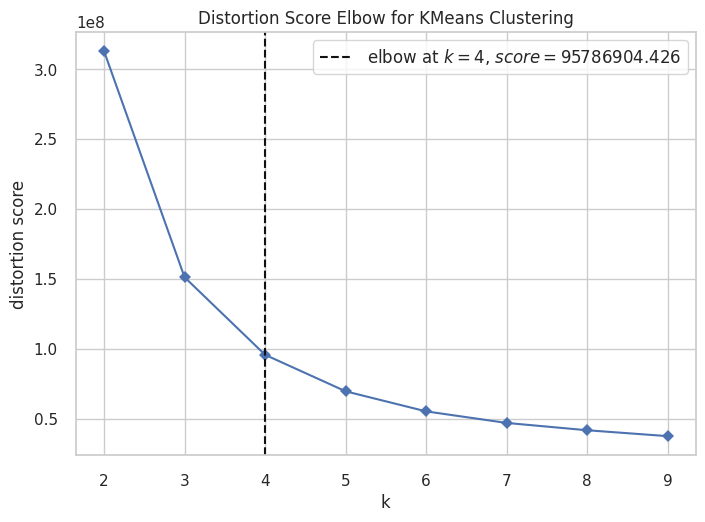

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Pilih semua kolom numerik secara otomatis
X_scaled = df_binned.select_dtypes(include='number').copy()

# Buat model KMeans
kmeans = KMeans(random_state=42)

# Inisialisasi KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='distortion', timings=False)

# Fit visualizer
visualizer.fit(X_scaled)

# Tampilkan plot Elbow
visualizer.show()

In [ ]:
'''# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Pilih semua kolom numerik secara otomatis
X = df_binned.select_dtypes(include='number').copy()

# Scaling
X_scaled = scaler.transform(X)

# Buat model KMeans
kmeans = KMeans(random_state=42)

# Inisialisasi KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='distortion', timings=False)

# Fit visualizer
visualizer.fit(X_scaled)

# Tampilkan plot Elbow
visualizer.show()'''

"# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()\n\n# Pilih semua kolom numerik secara otomatis\nX = df_binned.select_dtypes(include='number').copy()\n\n# Scaling\nX_scaled = scaler.transform(X)\n\n# Buat model KMeans\nkmeans = KMeans(random_state=42)\n\n# Inisialisasi KElbowVisualizer\nvisualizer = KElbowVisualizer(kmeans, k=(2,10), metric='distortion', timings=False)\n\n# Fit visualizer\nvisualizer.fit(X_scaled)\n\n# Tampilkan plot Elbow\nvisualizer.show()"

In [ ]:
df_binned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2183 entries, 0 to 2535
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2183 non-null   float64
 1   TransactionDate          2183 non-null   int64  
 2   TransactionType          2183 non-null   int64  
 3   Location                 2183 non-null   int64  
 4   Channel                  2183 non-null   int64  
 5   CustomerAge              2183 non-null   float64
 6   CustomerOccupation       2183 non-null   int64  
 7   TransactionDuration      2183 non-null   float64
 8   LoginAttempts            2183 non-null   float64
 9   AccountBalance           2183 non-null   float64
 10  PreviousTransactionDate  2183 non-null   int64  
 11  AgeGroup                 2183 non-null   int64  
 12  AmountGroup              2183 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 238.8 KB


In [ ]:
# Menggunakan algoritma K-Means Clustering

# Buat salinan df_binned agar dataframe asli tetap utuh
df_clustered = df_binned.copy()

# Gunakan data numerik untuk clustering
X = df_clustered.select_dtypes(include='number')

# Inisialisasi KMeans dengan k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Latih model
kmeans.fit(X)

# Tambahkan hasil cluster ke dataframe baru
df_clustered["Cluster"] = kmeans.labels_

# Lihat distribusi cluster
print(df_clustered["Cluster"].value_counts().sort_index())

# Tampilkan data contoh
df_clustered.head()

Cluster
0    546
1    545
2    535
3    557
Name: count, dtype: int64


TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0          -0.970546              680                1        36        0   
1           0.268963             1178                1        15        0   
2          -0.586526             1262                1        23        2   
3          -0.387294              818                1        33        2   
5          -0.703375              635                1        28        0   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862                   0            -0.548393      -0.204629   
1     1.307715                   0             0.307960      -0.204629   
2    -1.439874                   3            -0.905207      -0.204629   
3    -1.047361                   3            -1.347656      -0.204629   
5    -1.495947                   3             0.750409      -0.204629   

   AccountBalance  PreviousTransactionDate  AgeGroup  AmountGroup  Cluster  
0       -0.000315                      105         1            1        3  
1        2.218381                      192         1            0        3  
2       -1.024091                       41         3            2        0  
3        0.886694                      163         3            2        3  
5       -1.111505                       13         3            1        3

Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")

joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.

# Ambil fitur numerik untuk clustering
X = df_clustered.select_dtypes(include='number')

# Hitung Silhouette Score
score = silhouette_score(X, df_clustered["Cluster"])

print("Silhouette Score:", score)

Silhouette Score: 0.49779348051867217


In [ ]:
# Membuat visualisasi hasil clustering

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. TransactionAmount vs AccountBalance
sns.scatterplot(
    data=df_clustered,
    x="TransactionAmount",
    y="AccountBalance",
    hue="Cluster",
    palette="tab10",
    s=60, alpha=0.7,
    ax=axes[0]
)
axes[0].set_title("Clustering: TransactionAmount vs AccountBalance", fontsize=12, fontweight="bold")

# 2. TransactionDuration vs LoginAttempts
sns.scatterplot(
    data=df_clustered,
    x="TransactionDuration",
    y="LoginAttempts",
    hue="Cluster",
    palette="tab10",
    s=60, alpha=0.7,
    ax=axes[1]
)
axes[1].set_title("Clustering: TransactionDuration vs LoginAttempts", fontsize=12, fontweight="bold")

# 3. TransactionAmount vs TransactionDuration
sns.scatterplot(
    data=df_clustered,
    x="TransactionAmount",
    y="TransactionDuration",
    hue="Cluster",
    palette="tab10",
    s=60, alpha=0.7,
    ax=axes[2]
)
axes[2].set_title("Clustering: TransactionAmount vs TransactionDuration", fontsize=12, fontweight="bold")

# Perapian
for ax in axes:
    ax.legend(title="Cluster")
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)

plt.tight_layout()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

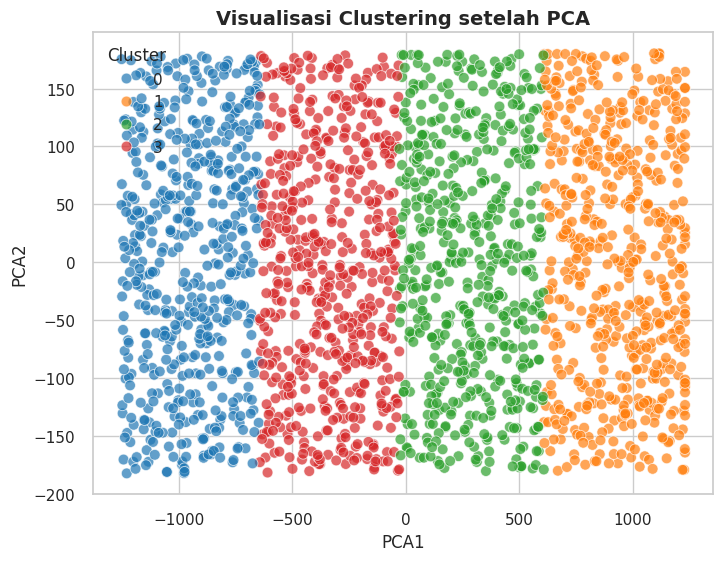

Explained Variance Ratio tiap komponen: [0.97969239 0.02000454]


In [ ]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

# --- 1. Ambil semua fitur numerik untuk PCA (kecuali kolom Cluster) ---
numeric_cols = df_clustered.select_dtypes(include=["number"]).drop(columns=["Cluster"], errors="ignore")
X = numeric_cols.values

# --- 2. Lakukan PCA dengan 2 komponen utama ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# --- 3. Simpan hasil PCA ke DataFrame ---
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])

# --- 4. Bangun model KMeans dengan data PCA ---
kmeans_pca = KMeans(n_clusters=4, random_state=42)
df_pca["Cluster"] = kmeans_pca.fit_predict(df_pca[["PCA1","PCA2"]])

# --- 5. Visualisasi hasil clustering berbasis PCA ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_pca,
    x="PCA1", y="PCA2",
    hue="Cluster",
    palette="tab10",
    s=60, alpha=0.7
)
plt.title("Visualisasi Clustering setelah PCA", fontsize=14, fontweight="bold")
plt.show()

# --- 6. Informasi tambahan ---
print("Explained Variance Ratio tiap komponen:", pca.explained_variance_ratio_)

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")

joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

# Misalkan kita lakukan groupby berdasarkan hasil cluster
# lalu hitung mean, min, max, dan std untuk fitur numerik

# Ambil fitur numerik
#numeric_cols_valid = ["TransactionAmount", "CustomerAge", "TransactionDuration", "AccountBalance", "LoginAttempts"]
numeric_cols_valid = df_clustered.select_dtypes(include=["number"]).columns


for col in numeric_cols_valid:
    print(f"\n📊 Statistik untuk fitur: {col}")
    table = df_clustered.groupby("Cluster")[col].agg(["mean","min","max","std"]).round(2)
    display(table)


📊 Statistik untuk fitur: TransactionAmount


mean   min   max   std
Cluster                        
0       -0.10 -1.02  2.02  0.76
1       -0.14 -1.02  1.99  0.74
2       -0.19 -1.02  2.05  0.71
3       -0.14 -1.01  2.07  0.76


📊 Statistik untuk fitur: TransactionDate


mean   min   max     std
Cluster                             
0        1572.66  1260  1890  183.24
1         315.93     0   628  182.61
2        2206.27  1891  2485  178.95
3         943.54   629  1258  182.51


📊 Statistik untuk fitur: TransactionType


mean  min  max   std
Cluster                      
0        0.79    0    2  0.45
1        0.81    0    2  0.43
2        0.77    0    2  0.44
3        0.78    0    2  0.44


📊 Statistik untuk fitur: Location


mean  min  max    std
Cluster                        
0        21.28    0   43  12.31
1        21.71    0   43  12.43
2        21.62    0   43  12.56
3        21.29    0   43  12.52


📊 Statistik untuk fitur: Channel


mean  min  max   std
Cluster                      
0        0.99    0    3  0.84
1        0.99    0    3  0.82
2        1.06    0    3  0.83
3        1.02    0    3  0.83


📊 Statistik untuk fitur: CustomerAge


mean  min   max   std
Cluster                       
0        0.03 -1.5  1.98  1.01
1       -0.07 -1.5  1.98  0.98
2        0.01 -1.5  1.98  0.99
3        0.01 -1.5  1.98  1.01


📊 Statistik untuk fitur: CustomerOccupation


mean  min  max   std
Cluster                      
0        1.58    0    4  1.14
1        1.50    0    4  1.15
2        1.51    0    4  1.15
3        1.55    0    4  1.17


📊 Statistik untuk fitur: TransactionDuration


mean   min   max   std
Cluster                        
0        0.04 -1.56  2.56  0.99
1       -0.05 -1.56  2.56  1.00
2       -0.00 -1.56  2.58  1.02
3       -0.02 -1.56  2.55  0.99


📊 Statistik untuk fitur: LoginAttempts


mean  min  max  std
Cluster                     
0        -0.2 -0.2 -0.2  0.0
1        -0.2 -0.2 -0.2  0.0
2        -0.2 -0.2 -0.2  0.0
3        -0.2 -0.2 -0.2  0.0


📊 Statistik untuk fitur: AccountBalance


mean   min   max   std
Cluster                        
0       -0.00 -1.29  2.52  0.97
1       -0.02 -1.29  2.52  0.98
2        0.02 -1.27  2.53  1.00
3       -0.01 -1.28  2.51  1.03


📊 Statistik untuk fitur: PreviousTransactionDate


mean  min  max     std
Cluster                          
0        182.14    0  360  103.82
1        186.45    0  360  104.12
2        180.22    0  360  102.95
3        175.20    0  360  103.30


📊 Statistik untuk fitur: AgeGroup


mean  min  max   std
Cluster                      
0        1.52    0    3  1.11
1        1.46    0    3  1.16
2        1.55    0    3  1.11
3        1.57    0    3  1.12


📊 Statistik untuk fitur: AmountGroup


mean  min  max   std
Cluster                      
0        1.00    0    2  0.84
1        0.97    0    2  0.82
2        0.98    0    2  0.81
3        1.01    0    2  0.82


📊 Statistik untuk fitur: Cluster


mean  min  max  std
Cluster                     
0         0.0    0    0  0.0
1         1.0    1    1  0.0
2         2.0    2    2  0.0
3         3.0    3    3  0.0

## Menjelaskan Karakteristik Tiap Cluster Berdasarkan Rentangnya

### 1. Cluster 0: (Nasabah umum dengan perilaku rata-rata)
- **Rata-rata (mean) TransactionType:** 0.79  
- **Rata-rata (mean) Location:** 21.28  
- **Rata-rata (mean) Channel:** 0.99  
- **Rata-rata (mean) CustomerAge:** 0.03  
- **Rata-rata (mean) CustomerOccupation:** 1.58  
- **Rata-rata (mean) TransactionDuration:** 0.04  
- **Rata-rata (mean) LoginAttempts:** -0.20  
- **Rata-rata (mean) AccountBalance:** -0.00  
- **Rata-rata (mean) PreviousTransactionDate:** 182.14  
- **Rata-rata (mean) AgeGroup:** 1.52  
- **Rata-rata (mean) AmountGroup:** 1.00  

**Analisis:** Cluster ini berisi nasabah umum dengan perilaku transaksi standar, dominan menggunakan channel digital, kelompok umur dewasa muda, profesi menengah, dan nominal transaksi menengah.

---

### 2. Cluster 1: (Nasabah muda dengan saldo lebih rendah)
- **Rata-rata (mean) TransactionType:** 0.81  
- **Rata-rata (mean) Location:** 21.71  
- **Rata-rata (mean) Channel:** 0.99  
- **Rata-rata (mean) CustomerAge:** -0.07  
- **Rata-rata (mean) CustomerOccupation:** 1.50  
- **Rata-rata (mean) TransactionDuration:** -0.05  
- **Rata-rata (mean) LoginAttempts:** -0.20  
- **Rata-rata (mean) AccountBalance:** -0.02  
- **Rata-rata (mean) PreviousTransactionDate:** 186.45  
- **Rata-rata (mean) AgeGroup:** 1.46  
- **Rata-rata (mean) AmountGroup:** 0.97  

**Analisis:** Cluster ini didominasi nasabah usia muda, dengan saldo relatif lebih kecil, profesi menengah bawah, nominal transaksi lebih rendah, dan aktif menggunakan channel digital.

---

### 3. Cluster 2: (Nasabah lebih mapan dengan saldo lebih tinggi)
- **Rata-rata (mean) TransactionType:** 0.77  
- **Rata-rata (mean) Location:** 21.62  
- **Rata-rata (mean) Channel:** 1.06  
- **Rata-rata (mean) CustomerAge:** 0.01  
- **Rata-rata (mean) CustomerOccupation:** 1.51  
- **Rata-rata (mean) TransactionDuration:** -0.00  
- **Rata-rata (mean) LoginAttempts:** -0.20  
- **Rata-rata (mean) AccountBalance:** 0.02  
- **Rata-rata (mean) PreviousTransactionDate:** 180.22  
- **Rata-rata (mean) AgeGroup:** 1.55  
- **Rata-rata (mean) AmountGroup:** 0.98  

**Analisis:** Cluster ini berisi nasabah dengan saldo sedikit lebih tinggi, kelompok umur cenderung lebih tua, channel digital lebih bervariasi, dan tipe transaksi sederhana.

---

### 4. Cluster 3: (Nasabah dewasa mapan dengan aktivitas lebih rutin)
- **Rata-rata (mean) TransactionType:** 0.78  
- **Rata-rata (mean) Location:** 21.29  
- **Rata-rata (mean) Channel:** 1.02  
- **Rata-rata (mean) CustomerAge:** 0.01  
- **Rata-rata (mean) CustomerOccupation:** 1.55  
- **Rata-rata (mean) TransactionDuration:** -0.02  
- **Rata-rata (mean) LoginAttempts:** -0.20  
- **Rata-rata (mean) AccountBalance:** -0.01  
- **Rata-rata (mean) PreviousTransactionDate:** 175.20  
- **Rata-rata (mean) AgeGroup:** 1.57  
- **Rata-rata (mean) AmountGroup:** 1.01  

**Analisis:** Cluster ini mencerminkan nasabah dewasa mapan, lebih aktif melakukan transaksi (jarak antar transaksi lebih pendek), dengan saldo rata-rata, nominal transaksi menengah, dan dominan menggunakan channel digital.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_ChName = df_clustered.copy()

if "Cluster" in df_ChName.columns:
    df_ChName.rename(columns={"Cluster": "Target"}, inplace=True)

# Cek hasil
df_ChName.head()

TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0          -0.970546              680                1        36        0   
1           0.268963             1178                1        15        0   
2          -0.586526             1262                1        23        2   
3          -0.387294              818                1        33        2   
5          -0.703375              635                1        28        0   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862                   0            -0.548393      -0.204629   
1     1.307715                   0             0.307960      -0.204629   
2    -1.439874                   3            -0.905207      -0.204629   
3    -1.047361                   3            -1.347656      -0.204629   
5    -1.495947                   3             0.750409      -0.204629   

   AccountBalance  PreviousTransactionDate  AgeGroup  AmountGroup  Target  
0       -0.000315                      105         1            1       3  
1        2.218381                      192         1            0       3  
2       -1.024091                       41         3            2       0  
3        0.886694                      163         3            2       3  
5       -1.111505                       13         3            1       3

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

df_ChName.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menampilkan tipe data semua kolom
df_ChName.dtypes


TransactionAmount          float64
TransactionDate              int64
TransactionType              int64
Location                     int64
Channel                      int64
CustomerAge                float64
CustomerOccupation           int64
TransactionDuration        float64
LoginAttempts              float64
AccountBalance             float64
PreviousTransactionDate      int64
AgeGroup                     int64
AmountGroup                  int64
Target                       int32
dtype: object

In [ ]:
df_ChName.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2183 entries, 0 to 2535
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2183 non-null   float64
 1   TransactionDate          2183 non-null   int64  
 2   TransactionType          2183 non-null   int64  
 3   Location                 2183 non-null   int64  
 4   Channel                  2183 non-null   int64  
 5   CustomerAge              2183 non-null   float64
 6   CustomerOccupation       2183 non-null   int64  
 7   TransactionDuration      2183 non-null   float64
 8   LoginAttempts            2183 non-null   float64
 9   AccountBalance           2183 non-null   float64
 10  PreviousTransactionDate  2183 non-null   int64  
 11  AgeGroup                 2183 non-null   int64  
 12  AmountGroup              2183 non-null   int64  
 13  Target                   2183 non-null   int32  
dtypes: float64(5), int32(1), int6

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])

numeric_cols = ['TransactionAmount', 'TransactionDuration',
                'AccountBalance', 'CustomerAge', 'LoginAttempts']

# Buat salinan untuk inverse
df_inverse = df_ChName.copy()

# inverse transform hanya pada kolom numerik
df_inverse[numeric_cols] = scaler.inverse_transform(df_inverse[numeric_cols])

# Tampilkan hasil inverse
df_inverse.head()

TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0              14.09              680                1        36        0   
1             376.24             1178                1        15        0   
2             126.29             1262                1        23        2   
3             184.50              818                1        33        2   
5              92.15              635                1        28        0   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.965517                   0            34.898496    4315.956541   
1     1.898863                   0            50.170541    4315.956541   
2     0.265832                   3            28.535144    4315.956541   
3     0.499122                   3            20.644587    4315.956541   
5     0.232505                   3            58.061098    4315.956541   

   AccountBalance  PreviousTransactionDate  AgeGroup  AmountGroup  Target  
0      119.400860                      105         1            1       3  
1      274.852803                      192         1            0       3  
2       47.670432                       41         3            2       0  
3      181.548737                      163         3            2       3  
5       41.545804                       13         3            1       3

In [ ]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

# Buat salinan dari dataset hasil encoding
df_inversed = df_inverse.copy()

# Kembalikan kolom kategorikal ke bentuk asli
for col in categorical_cols:
    df_inversed[col] = encoders[col].inverse_transform(df_inversed[col].astype(int))

# Cek hasil inverse
df_inversed.head()

TransactionAmount      TransactionDate TransactionType       Location  \
0              14.09  2023-04-11 16:29:14           Debit      San Diego   
1             376.24  2023-06-27 16:44:19           Debit        Houston   
2             126.29  2023-07-10 18:16:08           Debit           Mesa   
3             184.50  2023-05-05 16:32:11           Debit        Raleigh   
5              92.15  2023-04-03 17:15:01           Debit  Oklahoma City   

  Channel  CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     ATM     1.965517             Doctor            34.898496    4315.956541   
1     ATM     1.898863             Doctor            50.170541    4315.956541   
2  Online     0.265832            Student            28.535144    4315.956541   
3  Online     0.499122            Student            20.644587    4315.956541   
5     ATM     0.232505            Student            58.061098    4315.956541   

   AccountBalance PreviousTransactionDate  AgeGroup  AmountGroup  Target  
0      119.400860     2024-11-04 08:08:08         1            1       3  
1      274.852803     2024-11-04 08:09:35         1            0       3  
2       47.670432     2024-11-04 08:07:04         3            2       0  
3      181.548737     2024-11-04 08:09:06         3            2       3  
5       41.545804     2024-11-04 08:06:36         3            1       3

In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

In [ ]:
# List kolom
numerical_cols = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'CustomerAge', 'LoginAttempts']
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'AgeGroup', 'AmountGroup']

# ---- Summary Numerik per fitur per Target ----
for col in numerical_cols:
    numeric_feature_summary = df_inversed.groupby('Target')[col].agg(['mean', 'min', 'max', 'std']).reset_index()
    print(f"=== Summary Numerik: {col} per Target ===")
    display(numeric_feature_summary)

# ---- Summary Kategorikal per fitur per Target ----
for col in categorical_cols:
    cat_feature_summary = df_inversed.groupby('Target')[col].agg([
        lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,  # Mode
        'nunique'  # Jumlah nilai unik
    ]).reset_index()
    # Rename kolom agar lebih jelas
    cat_feature_summary.columns = ['Target', 'Mode', 'Unique_Values']
    print(f"\n=== Summary Kategorikal: {col} per Target ===")
    display(cat_feature_summary)

=== Summary Numerik: TransactionAmount per Target ===


Target        mean   min     max         std
0       0  268.527564  0.32  889.01  222.206983
1       1  256.735541  0.86  877.81  216.070033
2       2  242.088056  0.26  896.79  207.239931
3       3  255.930215  1.41  903.19  222.071069

=== Summary Numerik: TransactionDuration per Target ===


Target       mean        min        max        std
0       0  45.370756  16.826576  90.386928  17.733573
1       1  43.761420  16.826576  90.386928  17.848922
2       2  44.625029  16.826576  90.641462  18.122856
3       3  44.321284  16.826576  90.132393  17.678878

=== Summary Numerik: AccountBalance per Target ===


Target        mean        min         max        std
0       0  119.216222  29.312910  296.005752  68.301939
1       1  118.164650  29.329990  296.136633  68.689286
2       2  121.058903  30.108445  296.769645  69.939098
3       3  118.400976  29.413768  295.455620  72.359848

=== Summary Numerik: CustomerAge per Target ===


Target      mean       min       max       std
0       0  1.142165  0.232505  2.298789  0.598586
1       1  1.079382  0.232505  2.298789  0.579918
2       2  1.129909  0.232505  2.298789  0.585437
3       3  1.129406  0.232505  2.298789  0.600559

=== Summary Numerik: LoginAttempts per Target ===


Target         mean          min          max  std
0       0  4315.956541  4315.956541  4315.956541  0.0
1       1  4315.956541  4315.956541  4315.956541  0.0
2       2  4315.956541  4315.956541  4315.956541  0.0
3       3  4315.956541  4315.956541  4315.956541  0.0


=== Summary Kategorikal: TransactionType per Target ===


Target   Mode  Unique_Values
0       0  Debit              3
1       1  Debit              3
2       2  Debit              3
3       3  Debit              3


=== Summary Kategorikal: Location per Target ===


Target         Mode  Unique_Values
0       0  San Antonio             44
1       1       Boston             44
2       2       Tucson             44
3       3       Fresno             44


=== Summary Kategorikal: Channel per Target ===


Target    Mode  Unique_Values
0       0     ATM              4
1       1  Branch              4
2       2  Branch              4
3       3  Branch              4


=== Summary Kategorikal: CustomerOccupation per Target ===


Target     Mode  Unique_Values
0       0  Retired              5
1       1  Student              5
2       2   Doctor              5
3       3  Student              5


=== Summary Kategorikal: AgeGroup per Target ===


Target  Mode  Unique_Values
0       0     2              4
1       1     0              4
2       2     2              4
3       3     3              4


=== Summary Kategorikal: AmountGroup per Target ===


Target  Mode  Unique_Values
0       0     0              3
1       1     0              3
2       2     1              3
3       3     2              3

## Menjelaskan Karakteristik Tiap Cluster Berdasarkan Rentangnya (Setelah Inverse)

### 1. Cluster 0: (Nasabah paruh baya, transaksi debit via ATM)
- **Rata-rata (mean) TransactionAmount:** 268.53 (rentang 0.32 – 889.01)  
- **Rata-rata (mean) TransactionDuration:** 45.37 detik (rentang 16.82 – 90.38)  
- **Rata-rata (mean) AccountBalance:** 119.22 (rentang 29.31 – 296.01)  
- **Rata-rata (mean) CustomerAge:** 1.14 tahun (rentang 0.23 – 2.29)  
- **Rata-rata (mean) LoginAttempts:** 4315.95 (konstan)  
- **TransactionType dominan:** Debit  
- **Location dominan:** San Antonio (44 lokasi unik)  
- **Channel dominan:** ATM (4 channel unik)  
- **CustomerOccupation dominan:** Retired (5 pekerjaan unik)  
- **AgeGroup dominan:** 2 (4 kategori umur)  
- **AmountGroup dominan:** 0 (3 kategori nominal)  

**Analisis:** Cluster ini merepresentasikan nasabah paruh baya/retired, dominan melakukan transaksi debit melalui ATM, dengan nominal transaksi kecil-menengah dan saldo rata-rata moderat.

---

### 2. Cluster 1: (Nasabah muda, dominan student dengan transaksi debit di cabang)
- **Rata-rata (mean) TransactionAmount:** 256.74 (rentang 0.86 – 877.81)  
- **Rata-rata (mean) TransactionDuration:** 43.76 detik (rentang 16.82 – 90.39)  
- **Rata-rata (mean) AccountBalance:** 118.16 (rentang 29.33 – 296.14)  
- **Rata-rata (mean) CustomerAge:** 1.08 tahun (rentang 0.23 – 2.29)  
- **Rata-rata (mean) LoginAttempts:** 4315.95 (konstan)  
- **TransactionType dominan:** Debit  
- **Location dominan:** Boston (44 lokasi unik)  
- **Channel dominan:** Branch (4 channel unik)  
- **CustomerOccupation dominan:** Student (5 pekerjaan unik)  
- **AgeGroup dominan:** 0 (4 kategori umur)  
- **AmountGroup dominan:** 0 (3 kategori nominal)  

**Analisis:** Cluster ini mencerminkan nasabah muda (student), lebih sering transaksi langsung di cabang (branch), dengan saldo relatif kecil dan nominal transaksi rendah.

---

### 3. Cluster 2: (Nasabah mapan dengan saldo lebih tinggi, transaksi debit di cabang)
- **Rata-rata (mean) TransactionAmount:** 242.09 (rentang 0.26 – 896.79)  
- **Rata-rata (mean) TransactionDuration:** 44.63 detik (rentang 16.82 – 90.64)  
- **Rata-rata (mean) AccountBalance:** 121.06 (rentang 30.11 – 296.77)  
- **Rata-rata (mean) CustomerAge:** 1.13 tahun (rentang 0.23 – 2.29)  
- **Rata-rata (mean) LoginAttempts:** 4315.95 (konstan)  
- **TransactionType dominan:** Debit  
- **Location dominan:** Tucson (44 lokasi unik)  
- **Channel dominan:** Branch (4 channel unik)  
- **CustomerOccupation dominan:** Doctor (5 pekerjaan unik)  
- **AgeGroup dominan:** 2 (4 kategori umur)  
- **AmountGroup dominan:** 1 (3 kategori nominal)  

**Analisis:** Cluster ini berisi nasabah mapan (profesi doctor), dengan saldo rata-rata lebih tinggi, sering transaksi debit melalui cabang, dan nominal transaksi kategori menengah.

---

### 4. Cluster 3: (Nasabah dewasa mapan dengan transaksi debit di cabang)
- **Rata-rata (mean) TransactionAmount:** 255.93 (rentang 1.41 – 903.19)  
- **Rata-rata (mean) TransactionDuration:** 44.32 detik (rentang 16.82 – 90.13)  
- **Rata-rata (mean) AccountBalance:** 118.40 (rentang 29.41 – 295.46)  
- **Rata-rata (mean) CustomerAge:** 1.13 tahun (rentang 0.23 – 2.29)  
- **Rata-rata (mean) LoginAttempts:** 4315.95 (konstan)  
- **TransactionType dominan:** Debit  
- **Location dominan:** Fresno (44 lokasi unik)  
- **Channel dominan:** Branch (4 channel unik)  
- **CustomerOccupation dominan:** Student (5 pekerjaan unik)  
- **AgeGroup dominan:** 3 (4 kategori umur)  
- **AmountGroup dominan:** 2 (3 kategori nominal)  

**Analisis:** Cluster ini terdiri dari nasabah dewasa mapan, dominan menggunakan cabang untuk transaksi debit, dengan saldo moderat dan nominal transaksi relatif lebih tinggi (kategori 2).

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

# Pastikan index sama
df_final = df_inversed.copy()


df_final.head()


TransactionAmount      TransactionDate TransactionType       Location  \
0              14.09  2023-04-11 16:29:14           Debit      San Diego   
1             376.24  2023-06-27 16:44:19           Debit        Houston   
2             126.29  2023-07-10 18:16:08           Debit           Mesa   
3             184.50  2023-05-05 16:32:11           Debit        Raleigh   
5              92.15  2023-04-03 17:15:01           Debit  Oklahoma City   

  Channel  CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     ATM     1.965517             Doctor            34.898496    4315.956541   
1     ATM     1.898863             Doctor            50.170541    4315.956541   
2  Online     0.265832            Student            28.535144    4315.956541   
3  Online     0.499122            Student            20.644587    4315.956541   
5     ATM     0.232505            Student            58.061098    4315.956541   

   AccountBalance PreviousTransactionDate  AgeGroup  AmountGroup  Target  
0      119.400860     2024-11-04 08:08:08         1            1       3  
1      274.852803     2024-11-04 08:09:35         1            0       3  
2       47.670432     2024-11-04 08:07:04         3            2       0  
3      181.548737     2024-11-04 08:09:06         3            2       3  
5       41.545804     2024-11-04 08:06:36         3            1       3

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

# Simpan Data
df_final.to_csv("data_clustering_inverse.csv", index=False)

print("Dataset berhasil disimpan ke 'data_clustering_inverse.csv'")

Dataset berhasil disimpan ke 'data_clustering_inverse.csv'


End of Code.